In [31]:
import pandas as pd
import itertools
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
import numpy as np

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'


In [2]:
df = pd.read_csv('DS Test Dataset.csv')
df['WEEK_START'] = pd.to_datetime(df['WEEK_START'])

In [3]:
df_item1 = df[df['ITEM_NUMBER']=='ITEM_1']
df_item1.head()
df_item2 = df[df['ITEM_NUMBER']=='ITEM_2']
df_item2.head()
df_item3 = df[df['ITEM_NUMBER']=='ITEM_3']
df_item3.head()

,ITEM_NUMBER,orders,POS,ON_HAND,Price,WOS,STORE_COUNT,CATEGORY,SUBCATEGORY,WEEK_START
304,ITEM_3,813.0,507.0,1021.0,14.50,2.01,NaN,TRAVEL,Shades,2016-08-07
305,ITEM_3,813.0,526.0,NaN,12.99,NaN,NaN,TRAVEL,Shades,2016-08-14
306,ITEM_3,813.0,537.0,1118.0,13.00,2.08,NaN,TRAVEL,Shades,2016-08-21
307,ITEM_3,813.0,481.0,1103.0,12.71,2.29,NaN,TRAVEL,Shades,2016-08-28
308,ITEM_3,309.0,449.0,668.0,12.93,1.49,NaN,TRAVEL,Shades,2016-09-04


## Data Exploration

### Visualizing each item on-hand quantity time series data

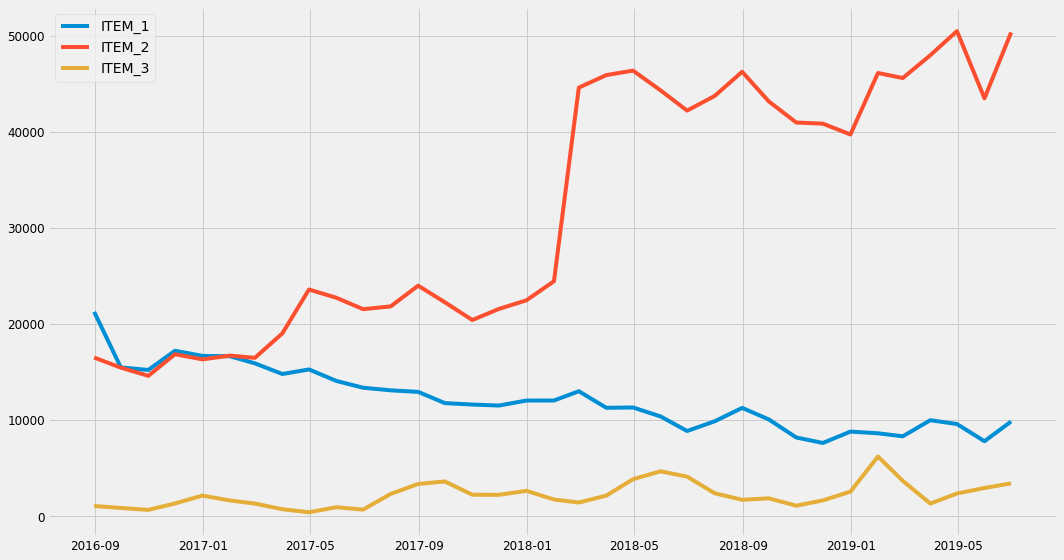

In [13]:
fig, ax = plt.subplots(figsize=(15, 8))
for i in range(1, 4):
    item = 'ITEM_' + str(i)
    df_1 = df[df['ITEM_NUMBER'] == item][['WEEK_START','ON_HAND']].dropna()
    # Indexing with Time Series Data
    df_1 = df_1.set_index('WEEK_START')
    
    # use the averages weekly sales value for that month, and we are using the end of each month as the timestamp.
    month_df_h = df_1['ON_HAND'].resample('M').mean()
    ax.plot(month_df_h, label = item)
ax.legend()
plt.tight_layout()
plt.show()



Some distinguishable patterns appear when I plot the on-hand data. 
1. For item1, the on-hand decreases steadly. 
2. For item2, its on-hand shows a growing trend and increased suddenly in Jan 2018.
3. For item3, the time-series has seasonality pattern, such as on-hand are always low at the beginning of the year and high at the end of the year. There is always an upward trend within any half year with a couple of low months in the mid of the year. This may be because it's a travel product.


For item3, We can also visualize our data using a method called time-series decomposition that allows us to decompose our time series into three distinct components: trend, seasonality, and noise

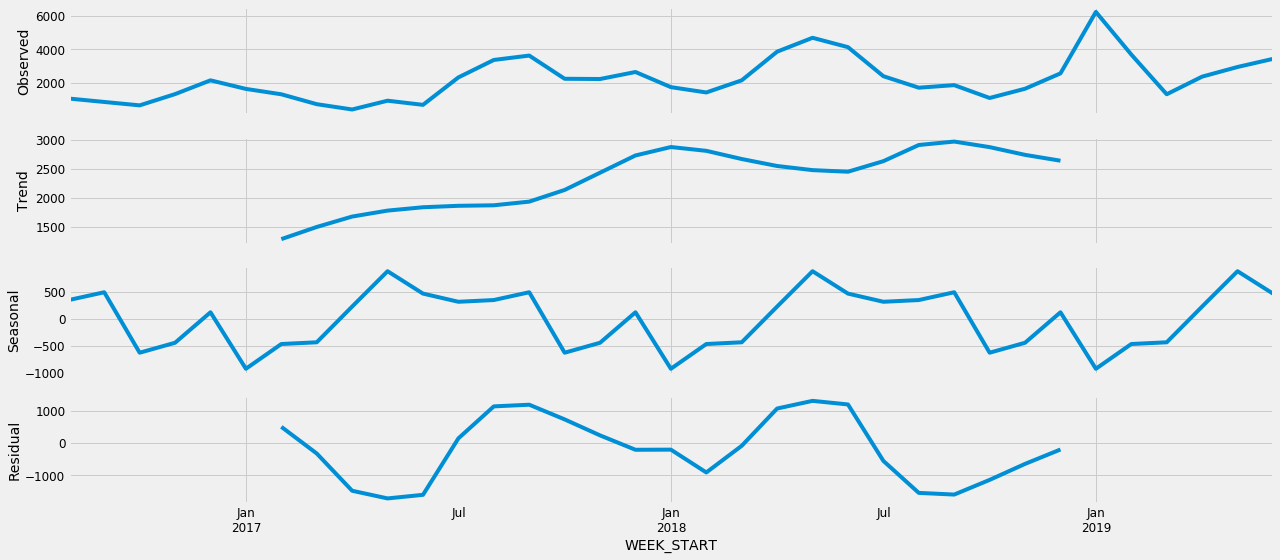

In [14]:
from pylab import rcParams
import statsmodels.api as sm

rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(month_df_h, model='additive')
fig = decomposition.plot()
plt.show()

## Data Modeling

### Time series forecasting with ARIMA

In [8]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [16]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(month_df_h,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:633.0582532767979
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:399.26983267635666
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:419.541923953281
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:197.2035533129682
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:585.9838991975093
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:367.8333519049985
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:404.796934101504
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:196.25247355500562
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:562.2793011262919
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:373.7756324280988
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:382.80457326036105
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:180.89124226607268
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:547.6494564474223
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:357.1989752463161
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:384.72151807723674
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:179.60436746258284
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:579.2092615121562
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:388.0098793134649
ARIMA(

### Fitting the ARIMA model

In [17]:
mod = sm.tsa.statespace.SARIMAX(month_df_h,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1755      1.122      0.157      0.876      -2.023       2.374
ma.L1         -1.0000      0.626     -1.597      0.110      -2.227       0.227
ar.S.L12      -0.9431      1.041     -0.906      0.365      -2.983       1.097
sigma2      1.815e+06   3.45e-07   5.26e+12      0.000    1.81e+06    1.81e+06


### Validating forecasts

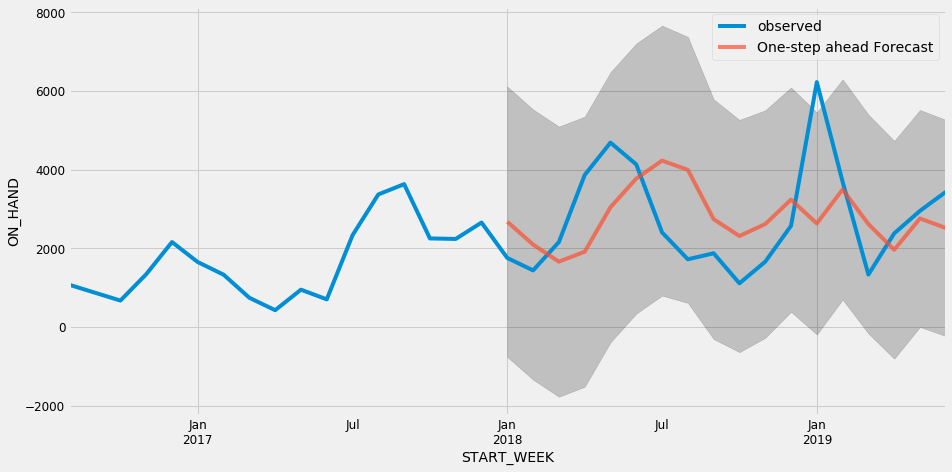

In [27]:
pred = results.get_prediction(start=pd.to_datetime('2018-01-31'), dynamic=False)
pred_ci = pred.conf_int()

ax = month_df_h['2016':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('START_WEEK')
ax.set_ylabel('ON_HAND')
plt.legend()

plt.show()

In [32]:
y_forecasted = pred.predicted_mean
y_truth = month_df_h['2018-01-31':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 1991776.69
The Root Mean Squared Error of our forecasts is 1411.3


Root Mean Square Error (RMSE) tells us that our model was able to forecast the average daily furniture sales in the test set within 1411.3 of the real sales. Our ITEM3 on-hand range from around 300 to over 6000. In my opinion, this is a pretty good model so far.

### Producing and visualizing forecasts

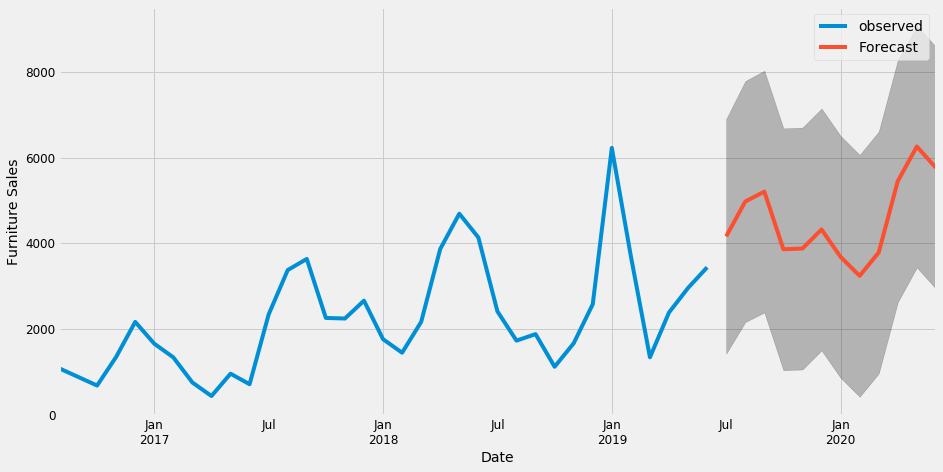

In [33]:
pred_uc = results.get_forecast(steps=12)
pred_ci = pred_uc.conf_int()

ax = month_df_h.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('WEEK_START')
ax.set_ylabel('ON_HAND')

plt.legend()
plt.show()


Our model clearly captured item3 on-hand qty seasonality. As we forecast further out into the future, it is natural for us to become less confident in our values. This is reflected by the confidence intervals generated by our model, which grow larger as we move further out into the future.